In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity




In [2]:
# Load
df = pd.read_excel('online_course_recommendation_v2.xlsx')

# Drop duplicates & fill missing
df.drop_duplicates(inplace=True)
df.fillna(0, inplace=True)

In [3]:
df

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,Python for Beginners,Emma Harris,39.1,Yes,Beginner,5.0,21600,317.50,0.797,Yes,17.60,4
1,861,1928,Cybersecurity for Professionals,Alexander Young,36.3,Yes,Beginner,4.3,15379,40.99,0.770,Yes,28.97,9
2,38159,9541,DevOps and Continuous Deployment,Dr. Mia Walker,13.4,Yes,Beginner,3.9,6431,380.81,0.772,Yes,52.44,4
3,44733,3708,Project Management Fundamentals,Benjamin Lewis,58.3,Yes,Beginner,3.1,48245,342.80,0.969,No,22.29,6
4,11285,3361,Ethical Hacking Masterclass,Daniel White,30.8,Yes,Beginner,2.8,34556,381.01,0.555,Yes,22.01,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10647,5466,Graphic Design with Canva,Emma Harris,17.3,Yes,Beginner,3.9,49101,485.34,0.838,Yes,16.35,3
99996,13800,2623,Stock Market and Trading Strategies,Dr. John Smith,68.4,Yes,Beginner,3.5,35107,162.80,0.922,Yes,41.94,7
99997,47131,1556,Networking and System Administration,Dr. John Smith,73.8,Yes,Beginner,4.3,12146,24.02,0.990,Yes,15.87,5
99998,49654,6001,Graphic Design with Canva,Daniel White,30.3,Yes,Beginner,3.5,9933,402.24,0.630,Yes,21.05,4


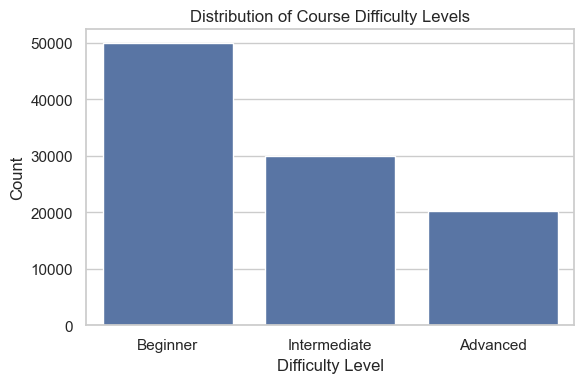

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Basic summary
summary = df.describe(include='all')

# Visualization 1: Course difficulty level distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='difficulty_level', order=df['difficulty_level'].value_counts().index)
plt.title("Distribution of Course Difficulty Levels")
plt.xlabel("Difficulty Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


C:\Users\cfaez\AppData\Local\Temp\ipykernel_5252\3509182160.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_courses, y='course_name', x='enrollment_numbers', palette='viridis')


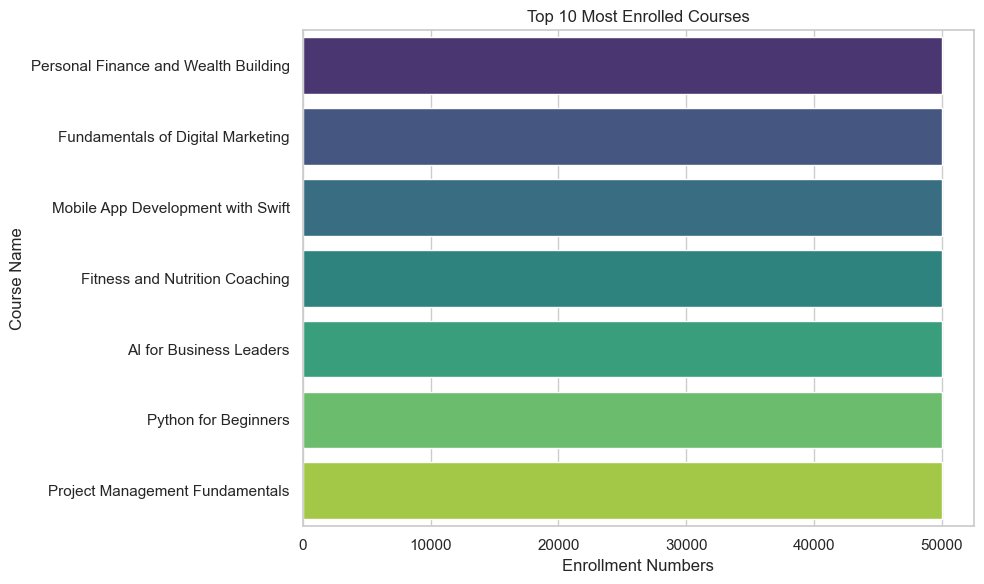

In [5]:
# Top 10 most enrolled courses
top_courses = df[['course_name', 'enrollment_numbers']].sort_values(by='enrollment_numbers', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_courses, y='course_name', x='enrollment_numbers', palette='viridis')
plt.title("Top 10 Most Enrolled Courses")
plt.xlabel("Enrollment Numbers")
plt.ylabel("Course Name")
plt.tight_layout()
plt.show()


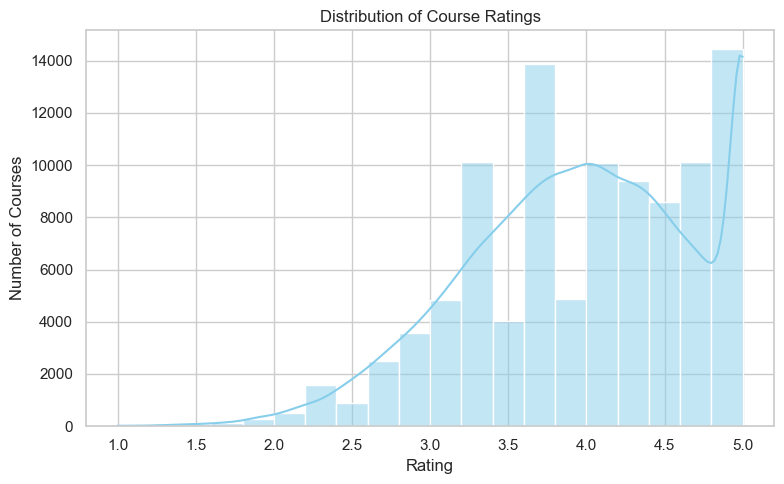

In [6]:
# Rating distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Course Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Courses")
plt.tight_layout()
plt.show()


C:\Users\cfaez\AppData\Local\Temp\ipykernel_5252\2533034322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='certification_offered', y='rating', palette='Set2')


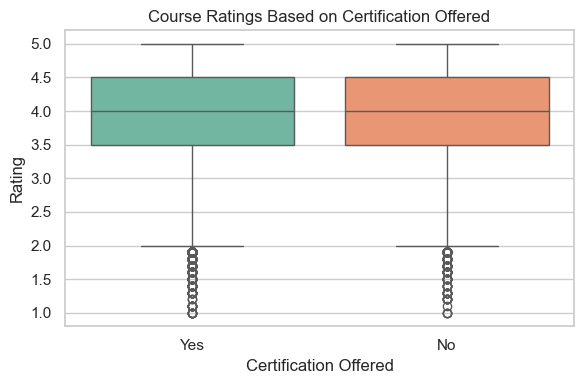

In [7]:
# Average rating based on certification offered
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='certification_offered', y='rating', palette='Set2')
plt.title("Course Ratings Based on Certification Offered")
plt.xlabel("Certification Offered")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


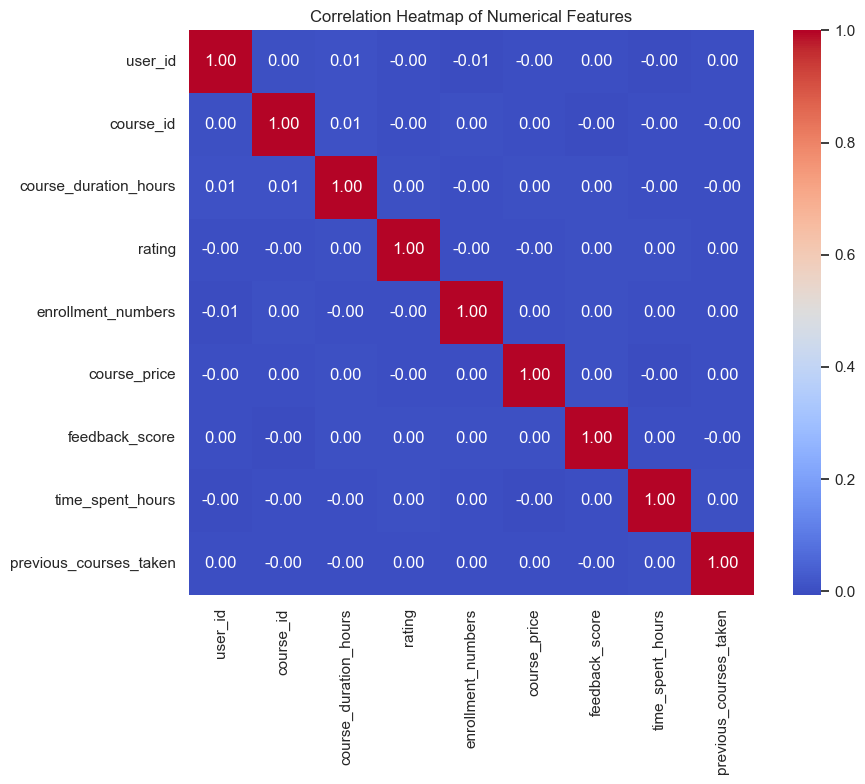

In [8]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()



In [9]:
# Remove users with very few ratings
user_counts = df['user_id'].value_counts()
df=df[df['user_id'].isin(user_counts[user_counts >= 3].index)]

In [10]:
df

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
1,861,1928,Cybersecurity for Professionals,Alexander Young,36.3,Yes,Beginner,4.3,15379,40.99,0.770,Yes,28.97,9
3,44733,3708,Project Management Fundamentals,Benjamin Lewis,58.3,Yes,Beginner,3.1,48245,342.80,0.969,No,22.29,6
4,11285,3361,Ethical Hacking Masterclass,Daniel White,30.8,Yes,Beginner,2.8,34556,381.01,0.555,Yes,22.01,5
5,6266,8076,Ethical Hacking Masterclass,Dr. John Smith,76.7,Yes,Advanced,3.6,36249,250.94,0.509,Yes,5.73,6
6,16851,7887,Networking and System Administration,Dr. Robert Davis,44.9,Yes,Beginner,4.9,41050,389.32,0.893,Yes,15.66,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,42387,8767,Cloud Computing Essentials,Jessica Martinez,65.3,No,Beginner,4.8,3385,117.24,0.722,No,18.06,2
99991,26655,2867,Stock Market and Trading Strategies,James Clark,14.7,No,Advanced,5.0,17622,205.22,0.717,Yes,9.82,6
99993,27580,3164,Data Visualization with Tableau,Sophia Anderson,35.2,Yes,Beginner,4.2,5503,446.09,0.650,Yes,11.20,3
99995,10647,5466,Graphic Design with Canva,Emma Harris,17.3,Yes,Beginner,3.9,49101,485.34,0.838,Yes,16.35,3


In [11]:
# Assume columns include: 'user_id', 'course_name', 'rating'
pivot_df = df.pivot_table(
    index='course_name', 
    columns='user_id', 
    values='rating',  # You can use 'feedback_score' or 'time_spent_hours' if needed
    fill_value=0
)


In [12]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

cosine_sim = cosine_similarity(pivot_df)

cosine_sim_df = pd.DataFrame(cosine_sim, index=pivot_df.index, columns=pivot_df.index)

overlap = np.dot((pivot_df > 0).astype(int), (pivot_df > 0).astype(int).T)
adjusted_sim = cosine_sim * overlap

adjusted_sim_df = pd.DataFrame(adjusted_sim, index=pivot_df.index, columns=pivot_df.index)


In [13]:
def recommend_course(course_name, top_n=5):
    if course_name not in adjusted_sim_df.columns:
        return f"'{course_name}' not found in course list."
    
    sim_scores = adjusted_sim_df[course_name]
    sim_scores = sim_scores.sort_values(ascending=False)
    return sim_scores[1:top_n+1]  # skip itself


In [14]:
recommend_course('Python for Beginners', top_n=5)


course_name
Advanced Machine Learning               56.969986
AI for Business Leaders                 56.299308
Cloud Computing Essentials              53.446483
Ethical Hacking Masterclass             53.138073
Networking and System Administration    52.675421
Name: Python for Beginners, dtype: float64

In [15]:
import pickle

# Save adjusted similarity dataframe as pickle
with open('course_similarity_model.pkl', 'wb') as f:
    pickle.dump(adjusted_sim_df, f)